In [56]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import os
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
import plotly.express as px

In [57]:
df = pd.read_excel(r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx')
dataset_path = r'C:\Users\TPWODL\New folder_Content\Twitter_X_Flow_Prediction_Tp\data\raw\twitter_x_data.xlsx'

In [58]:
df.shape

(32491, 23)

In [59]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [60]:
df.isnull().sum()

SL.NO                                 0
DATE                                  0
SHIFT DUTY                        24885
QUERY/REQUEST/COMPLAINT           29336
COMPLAINT DETAILS                     0
COMPLAINT NUMBER                  24336
SECTION                           10591
SUB-DIVISION                       7650
DIVISION                           7302
CIRCLE                             7392
COMPLAINT TYPE                        0
CONSUMER NUMBER                   22374
MOBILE NUMB                       27393
DEPT                                  0
CLOSED/OPEN                           0
REMARKS                              55
TWEET-LINK                            0
COMPLAINANT NAME                    586
COMPLAINT RECEIVED TIME             557
RESPONSE TIME                       610
SECOND RESPONSE TIME              23321
FINAL RESPONSE TIME               20133
FINAL RESPONSE DATE DD/MM/YYYY    19908
dtype: int64

In [61]:
df['SHIFT DUTY'].value_counts()

SHIFT DUTY
A    3424
B    2699
C    1483
Name: count, dtype: int64

In [62]:
df['COMPLAINT NUMBER'].value_counts().sum()

np.int64(8155)

In [63]:
df['QUERY/REQUEST/COMPLAINT'].value_counts()

QUERY/REQUEST/COMPLAINT
Complaint    1705
Query        1404
Request        46
Name: count, dtype: int64

In [64]:
df['SECTION'].value_counts()[df['SECTION'].value_counts() >= 3]

SECTION
AINTHAPALI      910
SINAPALI        663
UTKELA          490
RAIRAKHOL       416
CHHATAMAKHNA    396
               ... 
MAIN ROAD         6
SOHELA-2          6
PARMANPUR         4
SAHASPUR          4
KINJIRKELA        4
Name: count, Length: 202, dtype: int64

In [65]:
df['SUB-DIVISION'].value_counts()[df['SUB-DIVISION'].value_counts()>=2]

SUB-DIVISION
SDO-1, AINTHAPALI    1670
KHARIAR              1341
NARLA                1108
KESINGA               962
RAIRAKHOL             914
                     ... 
                        8
HEMGIRI                 8
Patnagarh               2
Kuarmunda               2
Padampur                2
Name: count, Length: 62, dtype: int64

In [66]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [67]:
df['DIVISION'].value_counts()

DIVISION
SAMBALPUR         2669
BOLANGIR          2519
KEED              2457
TITLAGARH         2383
BARGARH           2230
SAMBALPUR-E       2147
NUAPADA           1878
BARGARH(W)        1549
JHARSUGUDA        1445
SONEPUR           1291
KWED              1097
ROURKELA-SADAR     917
DEOGARH            706
SUNDERGARH         598
ROURKELA           524
RAJGANGPUR         494
BRAJRAJNAGAR       271
                     7
BRAJARAJNAGAR        5
SAMBALPUR            1
BOLANGIR-1           1
Name: count, dtype: int64

In [68]:
df['CIRCLE'].value_counts()

CIRCLE
SAMBALPUR    7190
BOLANGIR     6185
KALAHANDI    5411
BARGARH      3769
ROURKELA     2538
                6
Name: count, dtype: int64

In [69]:
df['CONSUMER NUMBER'].value_counts().sum()

np.int64(10117)

In [70]:
df['MOBILE NUMB'].value_counts().sum()

np.int64(5098)

In [71]:
df['DEPT'].value_counts()

DEPT
O&M           25890
Other          4425
Commercial     2176
Name: count, dtype: int64

In [72]:
df['CLOSED/OPEN'].value_counts()

CLOSED/OPEN
Closed    32189
Open        301
closed        1
Name: count, dtype: int64

In [73]:
df['COMPLAINANT NAME'].value_counts()[df['COMPLAINANT NAME'].value_counts() >= 10]

COMPLAINANT NAME
Mr. RAJESH KUMAR BAGARTI    189
Mr.RAJESH KUMAR BAGARTI     177
Mr. Deepak Kumar Sarangi    164
Mr. Bikramkesh4707          150
Mr. JYOTIRANJAN PADHAN      148
                           ... 
Mr. khagendra Bhoi           10
Mr. DIBYA DASH               10
Mr. @BaitaliGUPS             10
Mr. satya                    10
Mr. GuruRS6                  10
Name: count, Length: 597, dtype: int64

In [74]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [75]:
import pandas as pd

def generate_report(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a summary report DataFrame with category name and counts.
    Applies custom filters for certain columns.
    """
    report = {}

    # Direct value_counts
    report['SHIFT DUTY'] = df['SHIFT DUTY'].value_counts()
    report['QUERY/REQUEST/COMPLAINT'] = df['QUERY/REQUEST/COMPLAINT'].value_counts()
    report['DIVISION'] = df['DIVISION'].value_counts()
    report['CIRCLE'] = df['CIRCLE'].value_counts()
    report['DEPT'] = df['DEPT'].value_counts()
    report['CLOSED/OPEN'] = df['CLOSED/OPEN'].value_counts()

    # With filters
    report['SECTION (>=10)'] = df['SECTION'].value_counts()[df['SECTION'].value_counts() >= 10]
    report['SUB-DIVISION (>=5)'] = df['SUB-DIVISION'].value_counts()[df['SUB-DIVISION'].value_counts() >= 5]
    report['COMPLAINANT NAME (>=10)'] = df['COMPLAINANT NAME'].value_counts()[df['COMPLAINANT NAME'].value_counts() >= 20]

    # Totals (sum of counts)
    report['COMPLAINT NUMBER (total)'] = pd.Series(df['COMPLAINT NUMBER'].value_counts().sum(), index=['Total'])
    report['CONSUMER NUMBER (total)'] = pd.Series(df['CONSUMER NUMBER'].value_counts().sum(), index=['Total'])
    report['MOBILE NUMB (total)'] = pd.Series(df['MOBILE NUMB'].value_counts().sum(), index=['Total'])

    # Convert to DataFrame
    final_report = pd.concat(report, axis=0).reset_index()
    final_report.columns = ['Category', 'Sub-Category', 'Count']

    return final_report


In [76]:
final_report = generate_report(df)

In [77]:
final_report

,Category,Sub-Category,Count
0,SHIFT DUTY,A,3424
1,SHIFT DUTY,B,2699
2,SHIFT DUTY,C,1483
3,QUERY/REQUEST/COMPLAINT,Complaint,1705
4,QUERY/REQUEST/COMPLAINT,Query,1404
...,...,...,...
562,COMPLAINANT NAME (>=10),Mr. @Likun_Sahu66,20
563,COMPLAINANT NAME (>=10),Mr. Bibek Sahu,20
564,COMPLAINT NUMBER (total),Total,8155
565,CONSUMER NUMBER (total),Total,10117


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def visualize_report(df: pd.DataFrame):
    """
    Dashboard-style visualization for complaint report.
    Includes bar charts, horizontal charts, and KPI totals.
    """

    # --- 1. Bar charts for categorical distributions ---
    categorical_cols = ['SHIFT DUTY','DIVISION','CIRCLE','DEPT','CLOSED/OPEN']
    fig1, axes = plt.subplots(len(categorical_cols), 1, figsize=(8, 20))
    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f"{col} Distribution")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # --- 2. Horizontal bar charts for filtered categories ---
    filtered_data = {
        'SECTION (>=3)': df['SECTION'].value_counts()[df['SECTION'].value_counts() >= 10],
        'SUB-DIVISION (>=2)': df['SUB-DIVISION'].value_counts()[df['SUB-DIVISION'].value_counts() >= 5],
        'COMPLAINANT NAME (>=10)': df['COMPLAINANT NAME'].value_counts()[df['COMPLAINANT NAME'].value_counts() >= 20]
    }

    for title, series in filtered_data.items():
        fig = px.bar(series[::-1], orientation='h', title=title,
                     labels={'value':'Count','index':'Category'},
                     color=series[::-1].values, color_continuous_scale='Blues')
        fig.show()

    # --- 3. KPI-style totals ---
    totals = {
        'COMPLAINT NUMBER': df['COMPLAINT NUMBER'].value_counts().sum(),
        'CONSUMER NUMBER': df['CONSUMER NUMBER'].value_counts().sum(),
        'MOBILE NUMB': df['MOBILE NUMB'].value_counts().sum()
    }

    # Simple KPI cards using Plotly
    kpi_df = pd.DataFrame(list(totals.items()), columns=['Metric','Total'])
    fig = px.bar(kpi_df, x='Metric', y='Total', text='Total',
                 title="KPI Totals", color='Total', color_continuous_scale='Teal')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(yaxis=dict(showticklabels=False))
    fig.show()


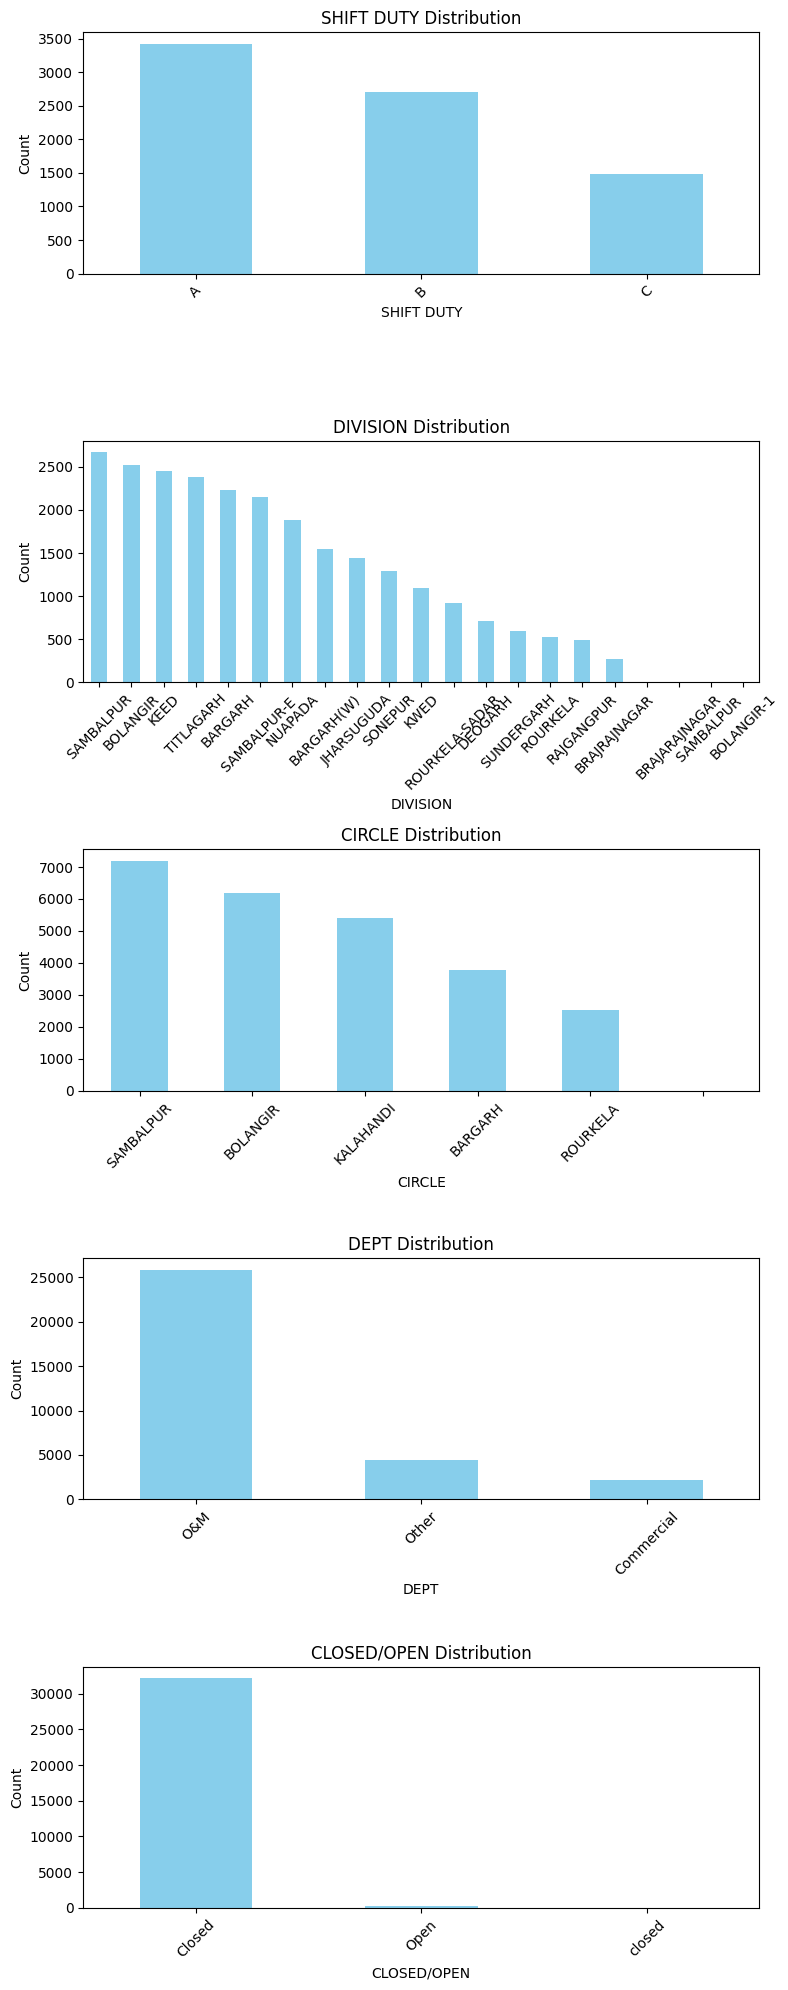

In [79]:
visualize_report(df)

In [90]:
import pandas as pd

def generate_report(dataset_path) -> None:
    """
    Generates a standardized summary report with filters and totals.
    Output format:
    Category | Sub-Category | Count
    """
    df = pd.read_excel(dataset_path)
    report_blocks = []

    def add_counts(category_name, series):
        temp = series.reset_index()
        temp.columns = ["Sub-Category", "Count"]
        temp["Category"] = category_name
        report_blocks.append(temp)

    # Basic value counts
    add_counts("SHIFT DUTY", df["SHIFT DUTY"].value_counts())
    add_counts("QUERY/REQUEST/COMPLAINT", df["QUERY/REQUEST/COMPLAINT"].value_counts())
    add_counts("DIVISION", df["DIVISION"].value_counts())
    add_counts("CIRCLE", df["CIRCLE"].value_counts())
    add_counts("DEPT", df["DEPT"].value_counts())
    add_counts("CLOSED/OPEN", df["CLOSED/OPEN"].value_counts())

    # Filtered counts
    add_counts("SECTION", df["SECTION"].value_counts()[lambda x: x >= 10])
    add_counts("SUB-DIVISION", df["SUB-DIVISION"].value_counts()[lambda x: x >= 5])
    add_counts("COMPLAINANT NAME", df["COMPLAINANT NAME"].value_counts()[lambda x: x >= 20])

    # Totals
    totals = pd.DataFrame({
        "Category": [
            "COMPLAINT NUMBER (Total)",
            "CONSUMER NUMBER (Total)",
            "MOBILE NUMB (Total)"
        ],
        "Sub-Category": ["Total", "Total", "Total"],
        "Count": [
            df["COMPLAINT NUMBER"].count(),
            df["CONSUMER NUMBER"].count(),
            df["MOBILE NUMB"].count()
        ]
    })

    final_report = pd.concat(report_blocks + [totals], ignore_index=True)
    return final_report


In [91]:
import plotly.express as px

def visualize_report(
    report_df: pd.DataFrame,
    category: str,
    top_n: int = 10
):
    """
    Creates an interactive, colorful bar chart for a selected category.
    Returns Plotly Figure.
    """

    filtered_df = (
        report_df[report_df["Category"] == category]
        .sort_values("Count", ascending=False)
        .head(top_n)
    )

    fig = px.bar(
        filtered_df,
        x="Sub-Category",
        y="Count",
        color="Count",
        text="Count",
        color_continuous_scale=px.colors.sequential.Viridis,
        title=f"{category} — Top {top_n} Distribution",
    )

    fig.update_layout(
        template="plotly_dark",
        xaxis_title="",
        yaxis_title="Count",
        title_x=0.5,
        font=dict(size=14),
        height=500,
        margin=dict(l=40, r=40, t=60, b=80),
    )

    fig.update_traces(
        textposition="outside",
        marker_line_width=1.5
    )

    return fig


In [92]:
# Generate report
report_df = generate_report(dataset_path)



In [93]:
report_df

,Sub-Category,Count,Category
0,A,3424,SHIFT DUTY
1,B,2699,SHIFT DUTY
2,C,1483,SHIFT DUTY
3,Complaint,1705,QUERY/REQUEST/COMPLAINT
4,Query,1404,QUERY/REQUEST/COMPLAINT
...,...,...,...
562,Mr. @Likun_Sahu66,20,COMPLAINANT NAME
563,Mr. Bibek Sahu,20,COMPLAINANT NAME
564,Total,8155,COMPLAINT NUMBER (Total)
565,Total,10117,CONSUMER NUMBER (Total)


In [94]:
fig = visualize_report(
    report_df,
    category="DEPT",
    top_n=12
)

fig.show()

In [100]:
df.columns

Index(['SL.NO', 'DATE', 'SHIFT DUTY', 'QUERY/REQUEST/COMPLAINT',
       'COMPLAINT DETAILS', 'COMPLAINT NUMBER', 'SECTION', 'SUB-DIVISION',
       'DIVISION', 'CIRCLE', 'COMPLAINT TYPE', 'CONSUMER NUMBER',
       'MOBILE NUMB', 'DEPT', 'CLOSED/OPEN', 'REMARKS', 'TWEET-LINK',
       'COMPLAINANT NAME', 'COMPLAINT RECEIVED TIME', 'RESPONSE TIME',
       'SECOND RESPONSE TIME', 'FINAL RESPONSE TIME',
       'FINAL RESPONSE DATE DD/MM/YYYY'],
      dtype='object')

In [116]:
import streamlit as st
import pandas as pd

# Load dataset
df = pd.read_excel(dataset_path)

# Ensure DATE and RESPONSE TIME are datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['RESPONSE TIME'] = pd.to_datetime(df['RESPONSE TIME'], format="%I:%M %p", errors='coerce')

# Extract shape
total_rows, total_columns = df.shape

# Complaint status counts
status_counts = df['CLOSED/OPEN'].value_counts()
closed_complaints = status_counts.get('Closed', 0)
open_complaints = status_counts.get('Open', 0)

# 90-day open complaints
df['DATE'] = pd.to_datetime(df['DATE'])
df['WITHIN_90_DAYS'] = (
    (pd.Timestamp.now() - df['DATE'] <= pd.Timedelta(days=90)) &
    (df['CLOSED/OPEN'] == 'Open')
)
ninety_day_open_count = df['WITHIN_90_DAYS'].sum()


# Average FRT time in minutes
df['FRT_MINUTES'] = df['RESPONSE TIME'].dt.hour * 60 + df['RESPONSE TIME'].dt.minute
avg_frt_minutes = int(df['FRT_MINUTES'].mean()) if not df['FRT_MINUTES'].isna().all() else 0
avg_frt_str = f"{avg_frt_minutes // 60:02d}:{avg_frt_minutes % 60:02d}"






In [109]:
time_col = "RESPONSE TIME"


In [ ]:
# Convert to datetime (robust)
df['RESPONSE TIME'] = pd.to_datetime(df['RESPONSE TIME'],errors="coerce",infer_datetime_format=True).dt.time

df['DATE']

In [115]:
df['RESPONSE TIME'].value_counts()

Series([], Name: count, dtype: int64)

In [122]:
import pandas as pd

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Define cutoff (last 90 days relative to today)
ninety_days_ago = pd.Timestamp.now() - pd.Timedelta(days=30)

# Filter rows: only open complaints within last 90 days
df_90_day_open = df[(df['DATE'] >= ninety_days_ago) & (df['CLOSED/OPEN'])].copy()







In [124]:
df_90_day_open.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 32229 to 32490
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   SL.NO                           262 non-null    int64         
 1   DATE                            262 non-null    datetime64[ns]
 2   SHIFT DUTY                      262 non-null    object        
 3   QUERY/REQUEST/COMPLAINT         262 non-null    object        
 4   COMPLAINT DETAILS               262 non-null    object        
 5   COMPLAINT NUMBER                68 non-null     object        
 6   SECTION                         190 non-null    object        
 7   SUB-DIVISION                    199 non-null    object        
 8   DIVISION                        199 non-null    object        
 9   CIRCLE                          200 non-null    object        
 10  COMPLAINT TYPE                  262 non-null    object        
 11  CONSU

In [126]:
import pandas as pd

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Define cutoff (last 90 days relative to today)
ninety_days_ago = pd.Timestamp.now() - pd.Timedelta(days=30)

# Filter rows: only open complaints within last 90 days
df_90_day_open = df[
    (df['DATE'] >= ninety_days_ago) &
    (df['CLOSED/OPEN'].str.lower() == 'open')
].copy()

# Optional: add a flag column
df_90_day_open['90_DAY_OPEN_FLAG'] = True

# Count if needed
ninety_day_open_count = len(df_90_day_open)




In [127]:
ninety_day_open_count

26